# Data Wrangling 

In [780]:
# Import the necessary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [719]:
# Import the file.
df = pd.read_csv('C:/Users/joshu/Downloads/Data/gun-violence-data_01-2013_03-2018.csv', parse_dates=['date'])

In [750]:
# Quick look at the structure of the dataset
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,n_victims,gun_type_parsed
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,4,0:Unknown
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,4,0:Unknown
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,4,0::Unknown||1::Unknown
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,4,0:Unknown
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,4,0::Handgun||1::Handgun


In [721]:
df.shape

(239677, 29)

In [723]:
# Note: Some entries are missing in 'incident_characteristics'.
df.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [760]:
# Convert 'date' column into datetime and create additional columns
df['date'] = pd.to_datetime(df.date)
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['monthday'] = df.date.dt.day
df['weekday'] = df.date.dt.weekday

In [766]:
# Create a new column 'n_victims' that contains number of injured and killed
df['victims'] = df['n_injured'] + df['n_killed']

In [792]:
# Filter out non-school shootings and store it into df1
df1 = df[df['incident_characteristics'].str.contains('school', na=False)]
df1 = df1[df1['incident_characteristics'].str.contains('Non-Aggression|Non-Shooting Incident', na=False) == False]

In [770]:
# Replace the empty entries with 'Unknown' in the 'gun_stolen' column
df1['gun_stolen'].fillna('Unknown', inplace=True)

In [777]:
# Clean up the 'gun_stolen' column
def cleanup(x):
    x = x.replace('|',',').replace('::',',')
    return x
gs_clean = df1.gun_stolen.apply(cleanup)

In [776]:
# Create a for-loop that shows how many guns are unknown, not stolen or stolen.
for row in df1.gun_stolen:
    if row.count('Stolen') == 0 & row.count('Not Stolen') == 0:
        row = 'Unknown: ' + str(row.count('Unknown'))
    elif row.count('Stolen') > 0 & row.count('Unknown') > 0 & row.count('Not Stolen') > 0:
        row = 'Stolen: ' + str(row.count('Stolen')) + ', Unknown: ' + str(row.count('Unknown')) + ', Not Stolen: ' + str(row.count('Not Stolen'))
    elif row.count('Stolen') > 0 & row.count('Unknown') > 0 & row.count('Not Stolen') == 0:
        row = 'Stolen: ' + str(row.count('Stolen')) + ', Unknown: ' + str(row.count('Unknown'))
    elif row.count('Stolen') > 0 & row.count('Unknown') == 0 & row.count('Not Stolen') == 0:
        row = 'Stolen: ' + str(row.count('Stolen'))
    elif row.count('Not Stolen') > 0 & row.count('Stolen') == 0 & row.count('Unknown') == 0:
        row = 'Not Stolen: ' + str(row.count('Not Stolen'))
    elif row.count('Not Stolen') > 0 & row.count('Stolen') > 0 & row.count('Unknown') == 0:
        row = 'Not Stolen: ' + str(row.count('Not Stolen') + ', Stolen: ' + str(row.count('Stolen')))
    elif row.count('Not Stolen') > 0 & row.count('Stolen') == 0 & row.count('Unknown') > 0:
        row = 'Not Stolen: ' + str(row.count('Not Stolen') + ', Unknown: ' + str(row.count('Unknown')))

In [749]:
gt.head()

,gun_type_parsed,n_killed,n_injured,count
0,0:12 gauge,1,0,2
1,0:20 gauge,1,0,1
2,0:20 gauge|1:16 gauge|2:Other,0,0,1
3,0:22 LR,0,3,7
4,0:22 LR|1:22 LR,0,1,1


In [747]:
df['gun_type_parsed'] = df['gun_type'].fillna('0:Unknown')
gt = df.groupby('gun_type_parsed').agg({'n_killed':'sum','n_injured':'sum','state':'count'}).reset_index().rename(columns={'state':'count'})

results={}
for i, each in gt.iterrows():
    wrds = each['gun_type_parsed'].split("||")
    for wrd in wrds:
        if 'Unknown' in wrd:
            continue
        wrd = wrd.replace('::',':').replace('|1','')
        gtype = wrd.split(':')[1]
        if gtype not in results:
            results[gtype] = {'killed':0, 'injured':0, 'used':0}
        results[gtype]['killed'] += each['n_killed']
        results[gtype]['injured'] += each['n_injured']
        results[gtype]['used'] += each['count']
results

{'10mm': {'injured': 8, 'killed': 7, 'used': 50},
 '12 gauge': {'injured': 154, 'killed': 138, 'used': 1114},
 '16 gauge': {'injured': 3, 'killed': 1, 'used': 32},
 '20 gauge': {'injured': 36, 'killed': 23, 'used': 207},
 '22 LR': {'injured': 629, 'killed': 385, 'used': 3355},
 '223 Rem [AR-15]': {'injured': 417, 'killed': 373, 'used': 1613},
 '25 Auto': {'injured': 90, 'killed': 46, 'used': 612},
 '28 gauge': {'injured': 1, 'killed': 0, 'used': 6},
 '30-06 Spr': {'injured': 13, 'killed': 11, 'used': 84},
 '30-30 Win': {'injured': 16, 'killed': 22, 'used': 110},
 '300 Win': {'injured': 1, 'killed': 1, 'used': 23},
 '308 Win': {'injured': 9, 'killed': 15, 'used': 92},
 '32 Auto': {'injured': 60, 'killed': 38, 'used': 490},
 '357 Mag': {'injured': 118, 'killed': 105, 'used': 824},
 '38 Spl': {'injured': 255, 'killed': 183, 'used': 1811},
 '380 Auto': {'injured': 282, 'killed': 156, 'used': 2396},
 '40 SW': {'injured': 702, 'killed': 347, 'used': 2749},
 '410 gauge': {'injured': 21, 'kill

In [767]:
temp1 = df[['state', 'n_killed']].groupby(['state'],as_index=False).sum().sort_values(by='n_killed', ascending=False).head(20)
temp2 = df[['state', 'n_injured']].groupby(['state'],as_index=False).sum().sort_values(by='n_injured', ascending=False)

In [730]:
df.groupby('date').agg({'n_killed':'sum','n_injured':'sum'})

,n_killed,n_injured
date,,
2013-01-01,2,10
2013-01-05,4,0
2013-01-07,6,2
2013-01-19,5,0
2013-01-21,0,9
2013-01-23,2,9
2013-01-25,1,3
2013-01-26,3,11
2013-02-02,0,5


# Data Exploration

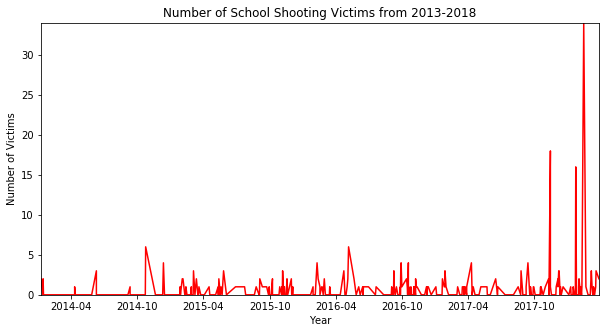

In [771]:
# Plot number of total victims from school shootings from 2013-2018
plt.figure(figsize=(10,5))
plt.plot(df1.date, df1.victims, c='red')
plt.axis([df1.date.min(),df1.date.max(),df1.victims.min(),df1.victims.max()])
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.title('Number of School Shooting Victims from 2013-2018')
plt.show()

In [772]:
# There seems to be 3 big outliers from 2017-09 to 2018-03
df1[['date','victims','n_injured','n_killed']].sort_values('victims',ascending=False)

,date,victims,n_injured,n_killed
232745,2018-02-14,34,17,17
218580,2017-11-14,18,12,6
229405,2018-01-23,16,14,2
43312,2014-10-24,6,1,5
124694,2016-05-06,6,3,3
151790,2016-10-18,4,4,0
181040,2017-04-10,4,1,3
208386,2017-09-13,4,3,1
111468,2016-02-09,4,4,0
49625,2014-12-12,4,4,0


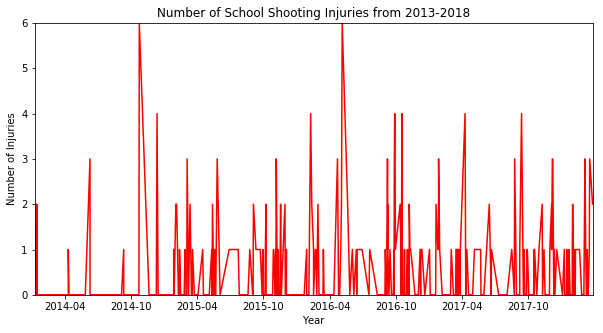

In [773]:
# Let's take a look at the injuries without the 3 big outliers
plt.figure(figsize=(10,5))
plt.plot(df1[df1.victims<=6].date, df1[df1.victims<=6].victims, c='red')
plt.axis([df1.date.min(),df1.date.max(),df1[df1.victims<=6].victims.min(),df1[df1.victims<=6].victims.max()])
plt.xlabel('Year')
plt.ylabel('Number of Injuries')
plt.title('Number of School Shooting Injuries from 2013-2018')
plt.show()

In [ ]:
df1[df1.n_injured<=4].sort_values('n_injured',ascending=False).n_injured.plot()

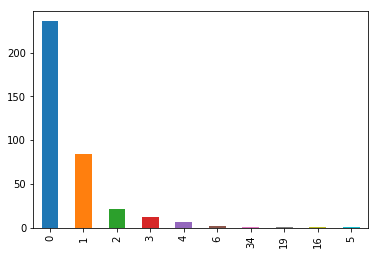

In [774]:
# The vast majority of school shootings resulted in 1 or no injuries. 
df1.groupby('date').victims.sum().sort_values().value_counts().plot(kind='bar')

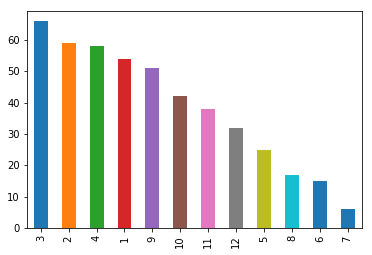

In [775]:
# Notice that gun shooting incidents drop off during the vacation months 
#(December, May, June, July and August)
df1.month.value_counts().plot(kind='bar')

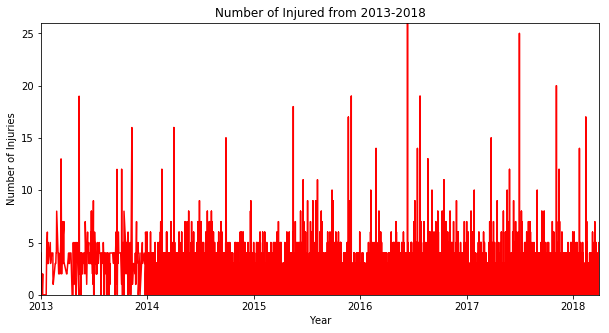

In [404]:
# To get a better picture, I changed the ylim to 26
plt.figure(figsize=(10,5))
plt.plot(df.date, df.n_injured, color='red')
plt.axis([df.date.min(),df.date.max(),0,55])
plt.xlabel('Year')
plt.ylim(ymax=26)
plt.ylabel('Number of Injuries')
plt.title('Number of Injured from 2013-2018')
plt.show()

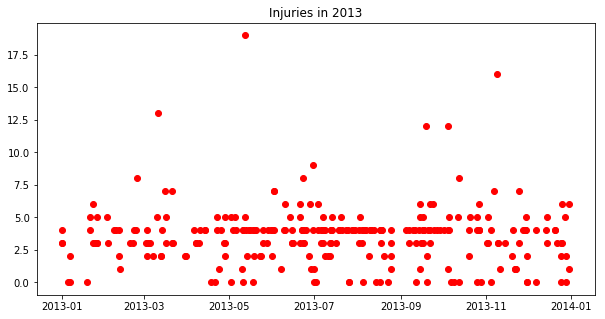

In [464]:
# Plot number of total injured for each year individually
plt.figure(figsize=(10,5))
plt.title('Injuries in 2013')
plt.plot_date(df.date[0:277],df.n_injured[0:277],color='red')
plt.show()

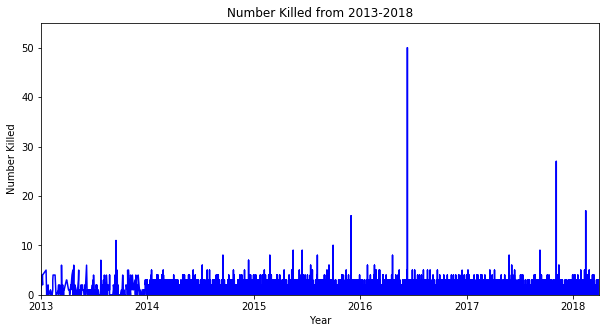

In [402]:
# Plot number of total killed from 2013-2018
plt.figure(figsize=(10,5))
plt.plot(df.date, df.n_killed, color='blue')
plt.axis([df.date.min(),df.date.max(),0,55])
plt.xlabel('Year')
plt.ylabel('Number Killed')
plt.title('Number Killed from 2013-2018')
plt.show()

In [787]:
# Average number of gun violence incidents by day of week
tempdf1 = df.groupby(['year', 'weekday']).agg({'weekday' : 'count'}).rename(columns={'weekday' : 'weekday_count'}).reset_index()
aggregated = tempdf1.groupby(['weekday']).agg({'weekday_count' : 'mean'})

x2 = aggregated.index.tolist()
y2 = aggregated.weekday_count.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
x2 = [weekmap[x] for x in x2]
wkmp = {}
for j,x in enumerate(x2):
    wkmp[x] = y2[j]
order = list(weekmap.values())
ordervals = [wkmp[val] for val in order]

In [791]:
# The most serious general gun violence incidents 
df3 = df.sort_values(['victims'], ascending=[False])
df3[['date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured']].head(10)

,date,state,city_or_county,address,n_killed,n_injured
130448,2016-06-12,Florida,Orlando,1912 S Orange Avenue,50,53
217151,2017-11-05,Texas,Sutherland Springs,216 4th St,27,20
101531,2015-12-02,California,San Bernardino,1365 South Waterman Avenue,16,19
232745,2018-02-14,Florida,Pompano Beach (Parkland),5901 Pine Island Rd,17,17
70511,2015-05-17,Texas,Waco,4671 S Jack Kultgen Fwy,9,18
195845,2017-07-01,Arkansas,Little Rock,220 W 6th St,0,25
137328,2016-07-25,Florida,Fort Myers,3580 Evans Ave,2,19
11566,2014-04-02,Texas,Fort Hood,Motor Pool Road and Tank Destroyer Boulevard,4,16
73,2013-05-12,Louisiana,New Orleans,Frenchmen Street,0,19
92624,2015-10-01,Oregon,Roseburg,1140 Umpqua College Rd,10,9
